In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm 
plt.rcParams['figure.figsize'] = (16, 9) 
plt.style.use('ggplot') 
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score


In [23]:
# Leer datos desde el archivo CSV
data = pd.read_csv('./p1p4.csv')

# Crear la variable 'suma' como la suma de enlaces, comentarios e imágenes
suma = (data["Clientes"] + data['Cuenta'] + data['Propinas']) 

# Crear un nuevo DataFrame para las variables independientes
dataX = pd.DataFrame()
dataX["Propinas"] = data["Propinas"]
dataX["suma"] = suma

# Convertir a arrays para la regresión
XY_train = np.array(dataX)
z_train = data['Propinas'].values 

# Crear un nuevo objeto de Regresión Lineal
regr = linear_model.LinearRegression() 

# Entrenar el modelo con 2 dimensiones
regr.fit(XY_train, z_train)

# Hacer la predicción
z_pred = regr.predict(XY_train)

# Imprimir los coeficientes
print('Coefficients: \n', regr.coef_)

# Imprimir el error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))

# Imprimir el puntaje de varianza
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [ 1.00000000e+00 -4.62690687e-17]
Mean squared error: 0.00
Variance score: 1.00


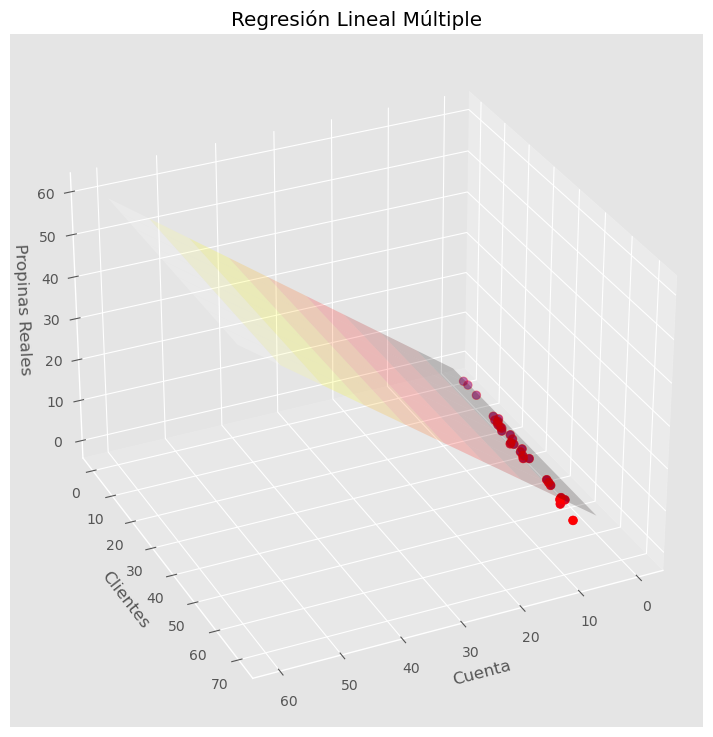

In [21]:
# Graficar la regresión en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 

# Crear una malla para graficar el plano
xx, yy = np.meshgrid(np.linspace(0, 60, num=10), np.linspace(0, 60, num=10))

# Calcular los valores del plano para los puntos x e y
nuevoX = (regr.coef_[0] * xx)
nuevoY = (regr.coef_[1] * yy)

# Calcular los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr.intercept_)

# Graficar el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficar en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue', s=30)

# Graficar en rojo los puntos predichos
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red', s=40)

# Configurar la visualización
ax.view_init(elev=30., azim=65)
ax.set_xlabel('Cuenta')
ax.set_ylabel('Clientes')
ax.set_zlabel('Propinas Reales')
ax.set_title('Regresión Lineal Múltiple')
plt.show()
